<a href="https://colab.research.google.com/github/siddharth-kale/Twitter-Analysis/blob/main/Stock_Twitter_Influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from platform import python_version

print(python_version())

3.9.7


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
!pip install --upgrade snscrape
import snscrape.modules.twitter as sntwitter
import re
!pip install networkx
import networkx as nx
import json
import re

In [3]:
pd.options.display.max_rows=1000

In [4]:
keyword = '$BIDU'
startdate = "2021-01-01"
enddate = "2022-01-07"

In [5]:
maxtweets = 5000000
tweetlist=[]
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{} until:{}'.format(keyword,startdate,enddate)).get_items()):
   if i>maxtweets:
         break
   tweetlist.append(tweet)

tweets_df = pd.DataFrame(tweetlist)

In [6]:
tweets_df.to_csv('G:\My Drive\Projects\Twitter Network Analysis\Data\{}Tweets.csv'.format(keyword))

In [7]:
tweets_df  = pd.read_csv('G:\My Drive\Projects\Twitter Network Analysis\Data\{}Tweets.csv'.format(keyword),low_memory=False,lineterminator='\n')

In [8]:
def extract_user(block):
  acceptstrtemp=block.replace("'","\"").replace("None","0").replace("False","0")
  acceptstr=re.sub('datetime\.datetime\([^a-z]+[^0-9]+\)','0',acceptstrtemp)
  dictstr=json.loads(acceptstr)
  return(dictstr['username'])

In [9]:
for i in range(0,len(tweets_df)):
  print(i)
  string=tweets_df.loc[i,'user']
  try:
    tweets_df.loc[i,'username'] = extract_user(string)
  except json.decoder.JSONDecodeError:
    pass

Streaming output truncated to the last 5000 lines.
45276
45277
45278
45279
45280
45281
45282
45283
45284
45285
45286
45287
45288
45289
45290
45291
45292
45293
45294
45295
45296
45297
45298
45299
45300
45301
45302
45303
45304
45305
45306
45307
45308
45309
45310
45311
45312
45313
45314
45315
45316
45317
45318
45319
45320
45321
45322
45323
45324
45325
45326
45327
45328
45329
45330
45331
45332
45333
45334
45335
45336
45337
45338
45339
45340
45341
45342
45343
45344
45345
45346
45347
45348
45349
45350
45351
45352
45353
45354
45355
45356
45357
45358
45359
45360
45361
45362
45363
45364
45365
45366
45367
45368
45369
45370
45371
45372
45373
45374
45375
45376
45377
45378
45379
45380
45381
45382
45383
45384
45385
45386
45387
45388
45389
45390
45391
45392
45393
45394
45395
45396
45397
45398
45399
45400
45401
45402
45403
45404
45405
45406
45407
45408
45409
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
45427
45428
45429
45430
45431
45432
45433
4

In [10]:
tweets_df_processed = tweets_df.dropna(subset=['username'])

In [11]:
#Code to filter out only the ticker
templist=[]

for i in range(0,len(tweets_df_processed)):

  if keyword[0]=='$':    
    templist=re.findall('\$\w+\s',str(tweets_df_processed.iloc[i,3]))
  else:
    templist=re.findall('(?i){}\s'.format(keyword),str(tweets_df_processed.iloc[i,3]))
  
  tweets_df_processed.loc[i,'TickerCount'] = len(templist)
  templist.clear()

tweets_df_processed

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\siddh\AppData\Local\Temp/ipykernel_13140/2770755615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags\r,username,TickerCount
0,0.0,https://twitter.com/uminoxhiro/status/14792392...,2022-01-06 23:51:30+00:00,昨晩のFNAG+銘柄の様子です。\n全体的には反発して+0.58％となっています。アリババ、...,昨晩のFNAG+銘柄の様子です。\n全体的には反発して+0.58％となっています。アリババ、...,1.479239e+18,"{'username': 'uminoxhiro', 'id': 1880253498, '...",0.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['米国株'],"['AAPL', 'AMZN', 'BABA', 'BIDU', 'FB', 'GOOGL'...",uminoxhiro,10.0
1,1.0,https://twitter.com/NDX100/status/147922648453...,2022-01-06 23:00:51+00:00,Starting a Swing in $BIDU today. Anticipating ...,Starting a Swing in $BIDU today. Anticipating ...,1.479226e+18,"{'username': 'NDX100', 'id': 70304039, 'displa...",0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['BIDU']\r,NDX100,1.0
2,2.0,https://twitter.com/cho_wilfred/status/1479221...,2022-01-06 22:42:20+00:00,DailyUp5\n$AMC $24.83 9.14% -14.20% -13.75% -3...,DailyUp5\n$AMC $24.83 9.14% -14.20% -13.75% -3...,1.479222e+18,"{'username': 'cho_wilfred', 'id': 125921570781...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['AMC', 'BBBY', 'BIDU', 'BIRD', 'BYND']\r",cho_wilfred,5.0
3,3.0,https://twitter.com/StockTipsTips/status/14792...,2022-01-06 22:21:42+00:00,$BABA $BIDU $VIPS $JD $DIDI $EGRNF $NIO $LI $X...,$BABA $BIDU $VIPS $JD $DIDI $EGRNF $NIO $LI $X...,1.479217e+18,"{'username': 'StockTipsTips', 'id': 1438735386...",1.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['BABA', 'BIDU', 'VIPS', 'JD', 'DIDI', 'EGRNF'...",StockTipsTips,9.0
4,4.0,https://twitter.com/ATFinanzascom/status/14792...,2022-01-06 22:05:13+00:00,Nueva posición alcista en valor del NASDAQ100:...,Nueva posición alcista en valor del NASDAQ100:...,1.479212e+18,"{'username': 'ATFinanzascom', 'id': 7062116415...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['BIDU']\r,ATFinanzascom,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
36264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
36269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
36271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0


In [12]:
onlyticker = tweets_df_processed[tweets_df_processed['TickerCount']==1].drop(columns=['Unnamed: 0']).dropna(subset=['content']).reset_index().drop(columns='index')
onlyticker

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags\r,username,TickerCount
0,https://twitter.com/NDX100/status/147922648453...,2022-01-06 23:00:51+00:00,Starting a Swing in $BIDU today. Anticipating ...,Starting a Swing in $BIDU today. Anticipating ...,1.479226e+18,"{'username': 'NDX100', 'id': 70304039, 'displa...",0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['BIDU']\r,NDX100,1.0
1,https://twitter.com/ATFinanzascom/status/14792...,2022-01-06 22:05:13+00:00,Nueva posición alcista en valor del NASDAQ100:...,Nueva posición alcista en valor del NASDAQ100:...,1.479212e+18,"{'username': 'ATFinanzascom', 'id': 7062116415...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['BIDU']\r,ATFinanzascom,1.0
2,https://twitter.com/GreatStockMark1/status/147...,2022-01-06 21:46:50+00:00,1/6 - Monthly-Weekly-Daily Up order by Weekly ...,1/6 - Monthly-Weekly-Daily Up order by Weekly ...,1.479208e+18,"{'username': 'GreatStockMark1', 'id': 12973237...",0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['stocks', 'stocksToWatch', 'stockcharts']","['SLB', 'WFC', 'DE', 'MRO', 'BAC', 'SCHW', 'BA...",GreatStockMark1,1.0
3,https://twitter.com/MC_OptionTrades/status/147...,2022-01-06 21:16:15+00:00,$BIDU Baidu - American Depositary Shares Each ...,$BIDU Baidu - American Depositary Shares Each ...,1.479200e+18,"{'username': 'MC_OptionTrades', 'id': 81848111...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['BIDU']\r,MC_OptionTrades,1.0
4,https://twitter.com/cho_wilfred/status/1479191...,2022-01-06 20:42:21+00:00,DailyUp5\n$BBBY $14.65 9.65% -1.84% -21.12% -6...,DailyUp5\n$BBBY $14.65 9.65% -1.84% -21.12% -6...,1.479192e+18,"{'username': 'cho_wilfred', 'id': 125921570781...",0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['BBBY', 'BIDU', 'BIRD', 'BYND', 'DASH']\r",cho_wilfred,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,https://twitter.com/ColtyTrades/status/1374219...,2021-03-23 04:38:53+00:00,3/23 WL \nTech had a strong day today but sold...,3/23 WL \nTech had a strong day today but sold...,1.374219e+18,"{'username': 'ColtyTrades', 'id': 150255626, '...",0.0,0.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['AAPL', 'AMZN', 'BIDU', 'FB', 'TSLA']\r",ColtyTrades,1.0
7688,https://twitter.com/the_six_god/status/1374208...,2021-03-23 03:54:59+00:00,@ArkkDaily @assetdash @StockMKTNewz $BIDU. A l...,@ArkkDaily @assetdash @StockMKTNewz $BIDU. A l...,1.374208e+18,"{'username': 'the_six_god', 'id': 2758506003, ...",0.0,0.0,2.0,0.0,...,NaN,1.374101e+18,"{'username': 'ArkkDaily', 'id': 13099497781979...","[{'username': 'ArkkDaily', 'id': 1309949778197...",NaN,NaN,NaN,['BIDU']\r,the_six_god,1.0
7689,https://twitter.com/myfxtrader/status/13741695...,2021-03-23 01:22:12+00:00,百度集团在港上市首日开盘涨0.8%，发行价为252港元/股。\n#百度 $BIDU http...,百度集团在港上市首日开盘涨0.8%，发行价为252港元/股。\n#百度 $BIDU http...,1.374170e+18,"{'username': 'myfxtrader', 'id': 1059638356609...",0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['百度'],['BIDU']\r,myfxtrader,1.0
7690,https://twitter.com/KusoDB/status/137413252819...,2021-03-22 22:54:59+00:00,$BIDU イケてないな(;´Д`),$BIDU イケてないな(;´Д`),1.374133e+18,"{'username': 'KusoDB', 'id': 2879128314, 'disp...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['BIDU']\r,KusoDB,1.0


In [13]:
interaction_df = pd.DataFrame(columns=['source','target'])
ind=0

for i in range(0,len(onlyticker)):
  templist=[]
  templist=re.findall('@\w+',str(onlyticker.iloc[i,2]))
  
  if len(templist)==0:
    interaction_df.loc[ind,'source'] = onlyticker.iloc[i,27]
    interaction_df.loc[ind,'target'] = ''
    ind = ind+1

  else:
    for j in range(0,len(templist)):
      interaction_df.loc[ind,'source'] = onlyticker.iloc[i,27]
      interaction_df.loc[ind,'target'] = templist[j][1:]
      ind = ind+1

interaction_df



,source,target
0,NDX100,
1,ATFinanzascom,
2,GreatStockMark1,
3,MC_OptionTrades,
4,cho_wilfred,
...,...,...
8240,the_six_god,assetdash
8241,the_six_god,StockMKTNewz
8242,myfxtrader,
8243,KusoDB,


In [14]:
interaction_df = interaction_df[interaction_df['target'].isin(interaction_df['source'])]
interaction_df

,source,target
6,C_Mouse1,NlCKStocks
100,mrtsummit,og_clo
102,mrtsummit,MarketWN
105,superman102311,MarketWN
110,InvestorGroup1,MarketWN
113,og_clo,MarketWN
119,dianegracely,MarketWN
121,JohnACarter,MarketWN
124,Otti622274562,MarketWN
128,ortizjl2003,MarketWN


In [15]:
filterout=[]

In [16]:
nodes_df = pd.DataFrame(interaction_df.stack()).reset_index().drop(columns=['level_0','level_1'])
nodes_df.columns=['username']
complete_nodes=list(set(nodes_df[~nodes_df['username'].isin(filterout)]['username'].to_list()))

In [17]:
G = nx.DiGraph()

In [18]:
for i in range(0,len(complete_nodes)):
  G.add_node(complete_nodes[i])

print(G.number_of_nodes())

377


In [19]:
full_interaction_df = interaction_df[~interaction_df['target'].isin(filterout)]
for i in range(0,len(full_interaction_df)):
  G.add_edge(full_interaction_df.iloc[i,0],full_interaction_df.iloc[i,1])

In [20]:
nodedegree=pd.DataFrame.from_dict(dict(G.in_degree),orient='index')
nodedegree = nodedegree.reset_index()
nodedegree.columns=['Name','InDegree']
nodedegree = nodedegree.sort_values(by='InDegree',ascending=False)
nodedegree.head(10)

,Name,InDegree
91,data168,16
149,skaushi,12
209,MarketWN,9
282,AjTrader7,8
224,ThetaWarrior,7
304,BuyandHoldd,7
311,LuoshengPeng,7
34,jablamsky,7
228,AltitudeChaz,5
126,MMeatloaf7,5


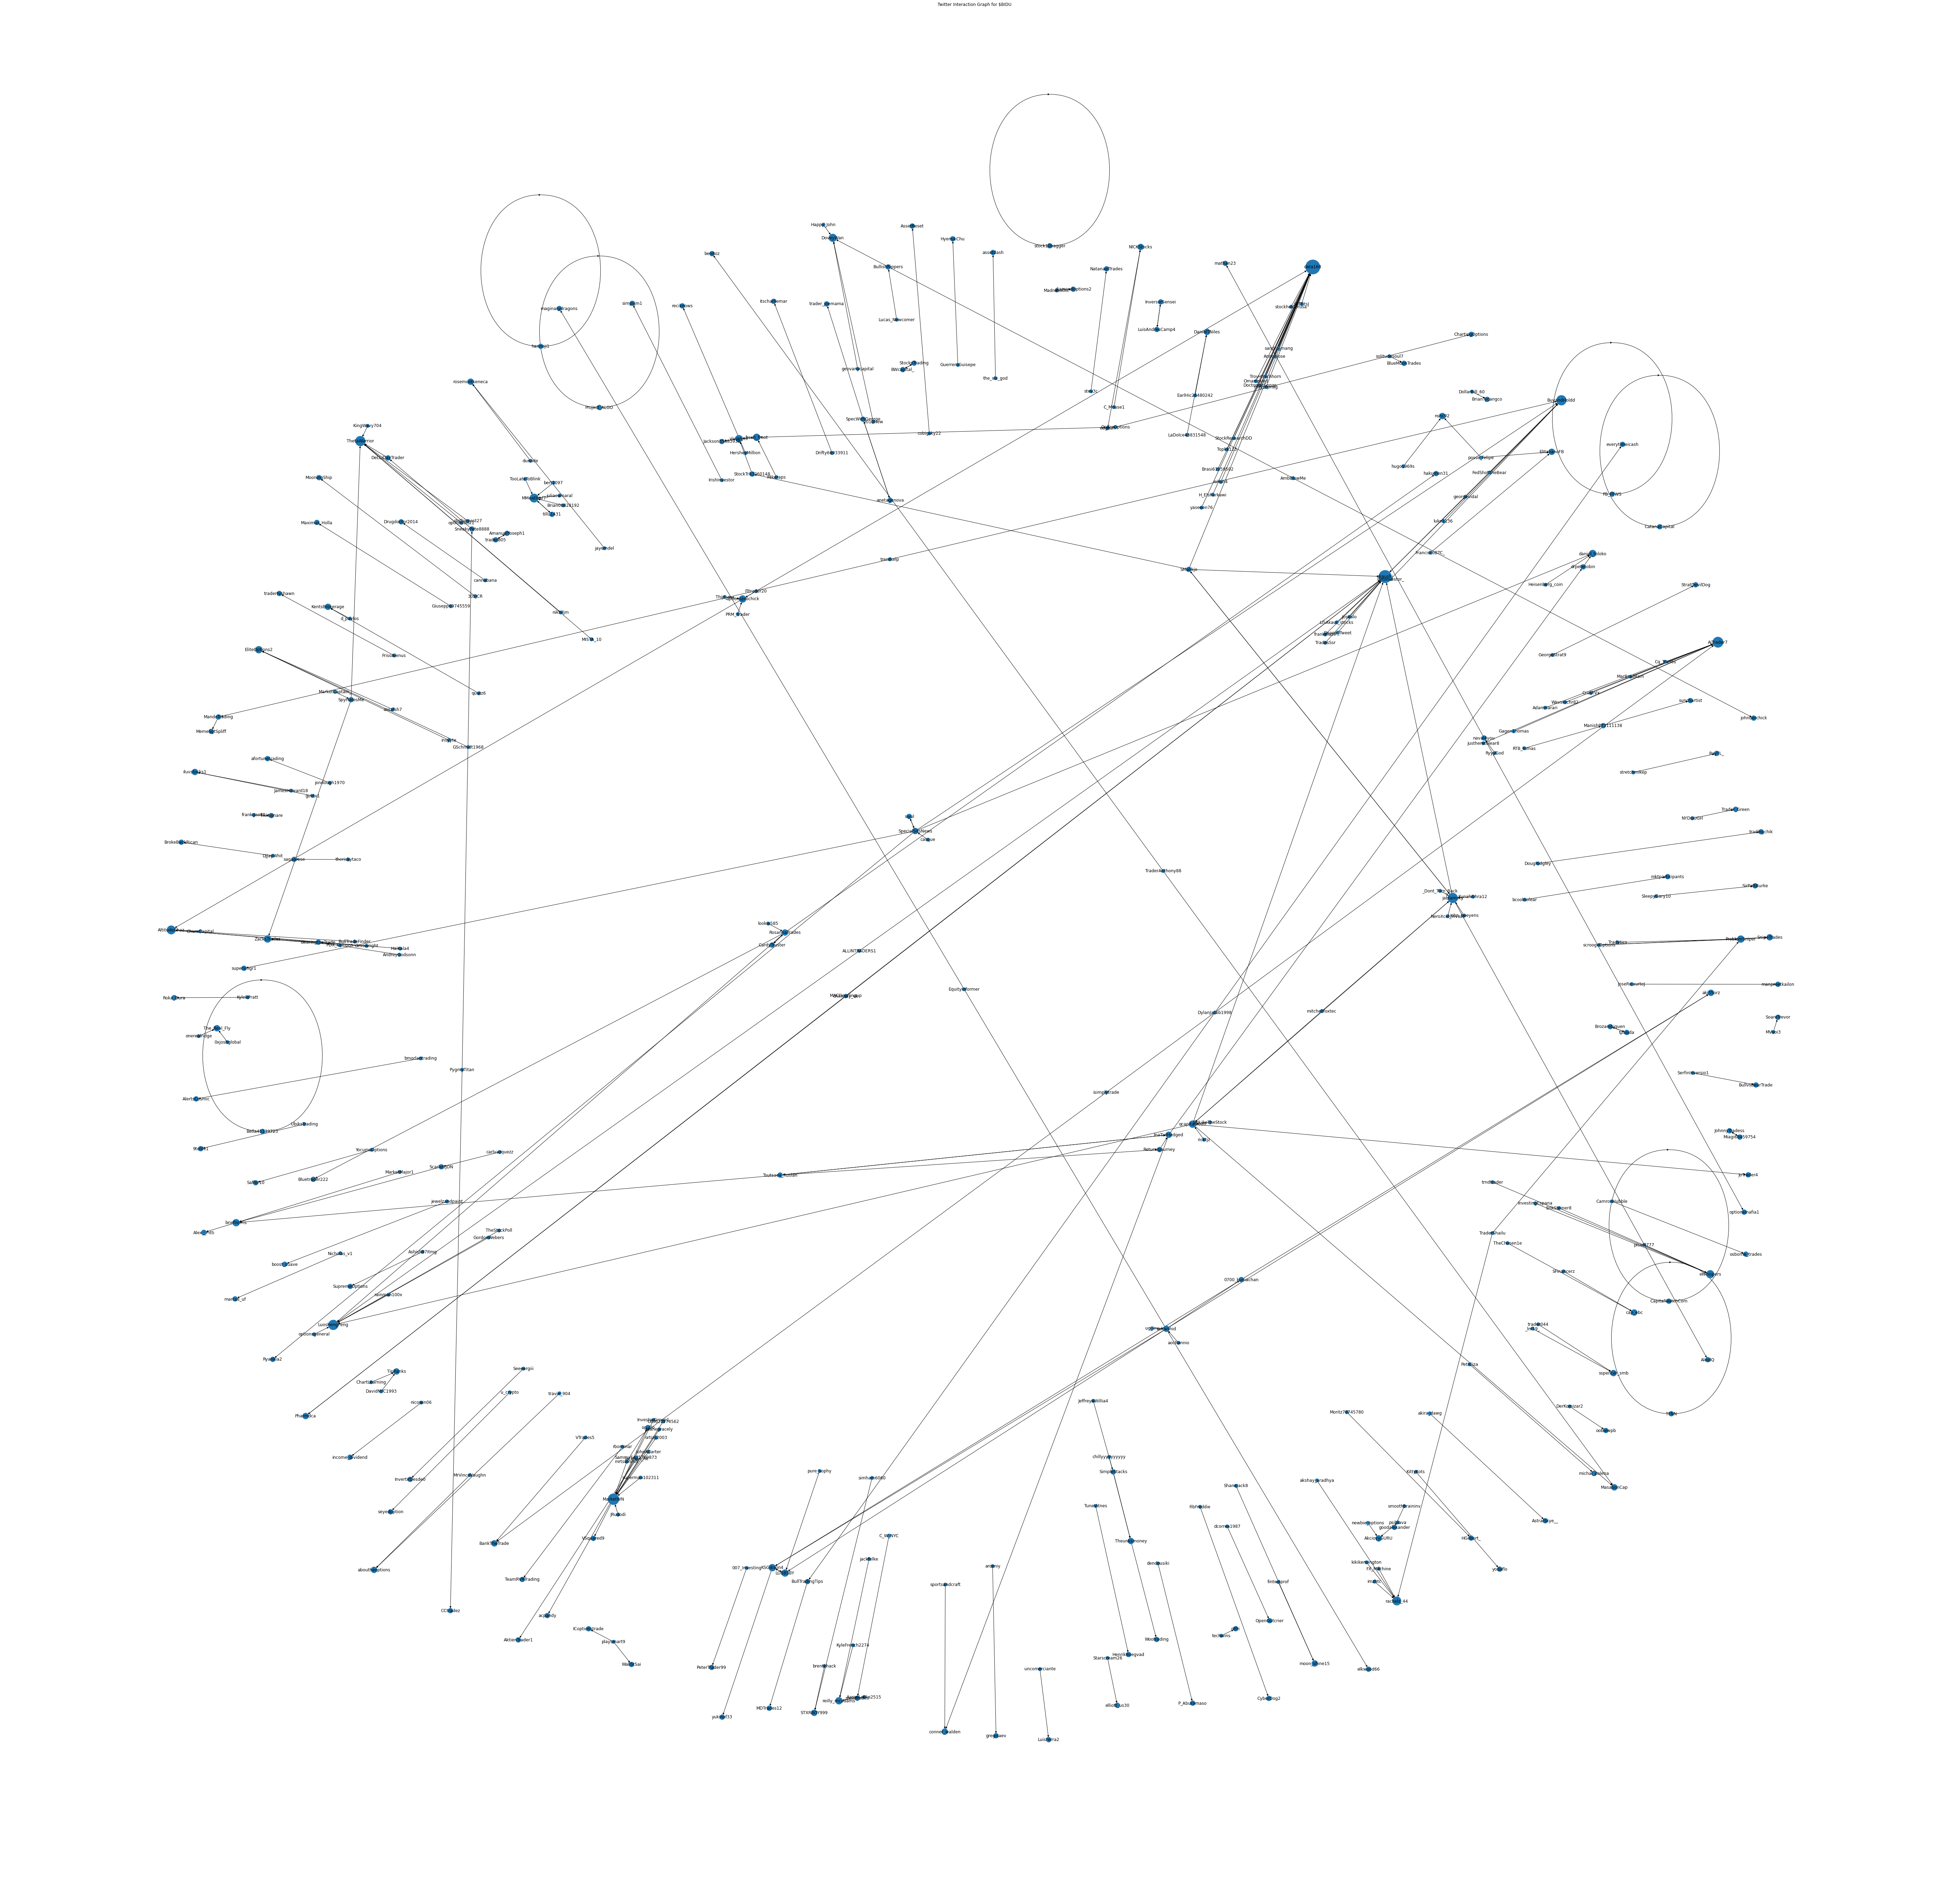

In [21]:
d =dict(G.in_degree)
plt.figure(figsize=(100,100))
plt.title('Twitter Interaction Graph for {}'.format(keyword))
nx.draw(G,node_size=[(x+1) * 100 for x in list(d.values())],with_labels=True)
plt.show()